# Setup

In [254]:
import os

import numpy as np
import matplotlib.pyplot as plt
import h5py

import slab.dsfit as dsf
from scipy.fft import rfft, rfftfreq

from exp_analysis import *

In [260]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data path

In [3]:
data_path = 'S:\\_Data\\20230704_Cooldown4_Transmon_NIST_JPA\\qick_exp\\data\\'

In [5]:
import json
import pandas as pd

# Resonator Spectroscopy

In [263]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


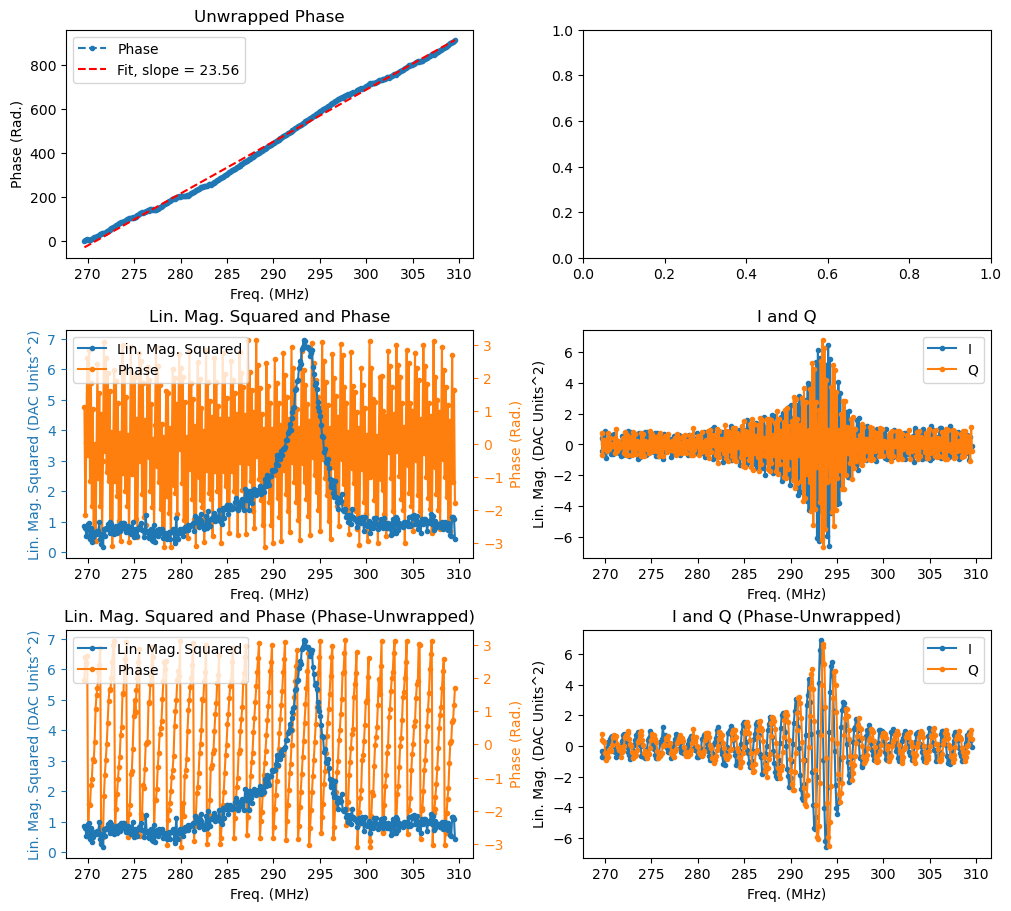

In [113]:
i_unwrap1, q_unwrap1 = iq_phase_unwrap(freq, I, Q)

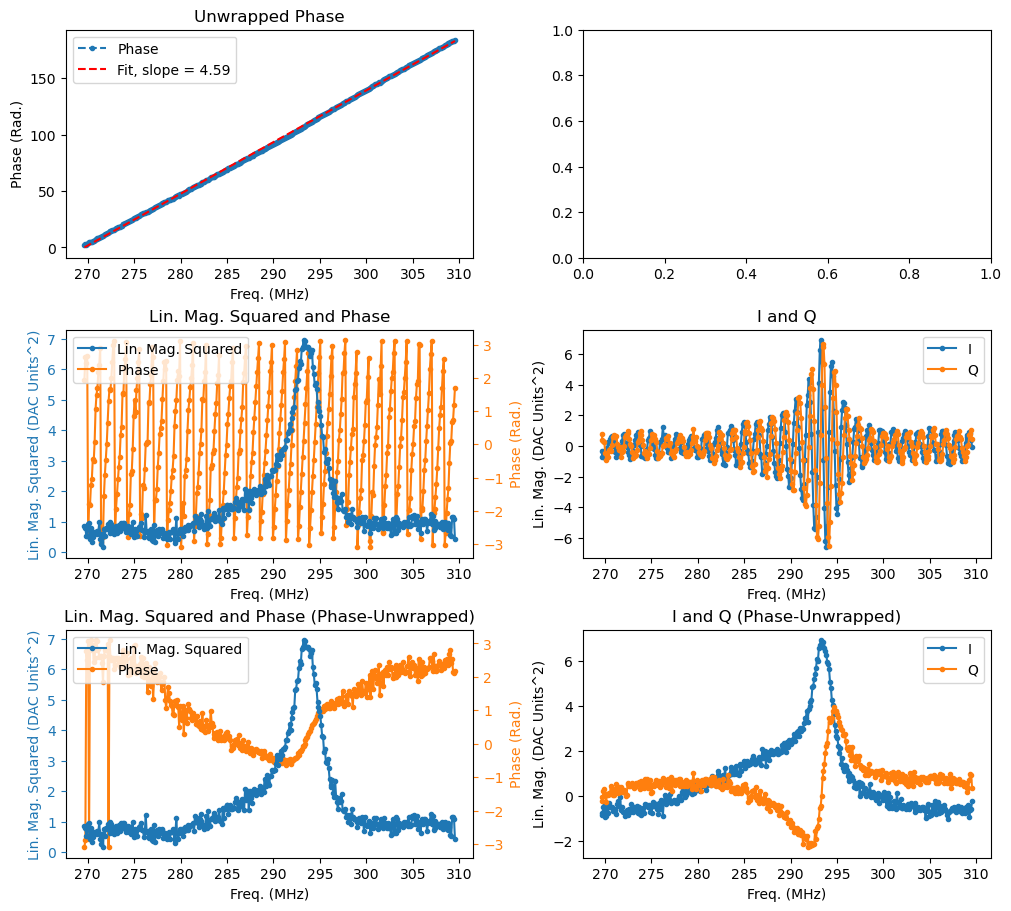

In [114]:
i_unwrap2, q_unwrap2 = iq_phase_unwrap(freq, i_unwrap1, q_unwrap1)

In [126]:
with h5py.File(data_path + '00011_ResonatorSpectroscopy.h5', 'r') as a:
    cfg =  (json.loads(a.attrs['config']))
    lo_freq = cfg['device']['soc']['readout']['lo']

    I = a['avgi'][0]
    Q = a['avgq'][0]
    freq = a['xpts'][0] + lo_freq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Resonator Frequency (MHz): 4272.656805855231
Resonator HWHM (MHz): 2.466097965166786
Q: 866.2788068855701


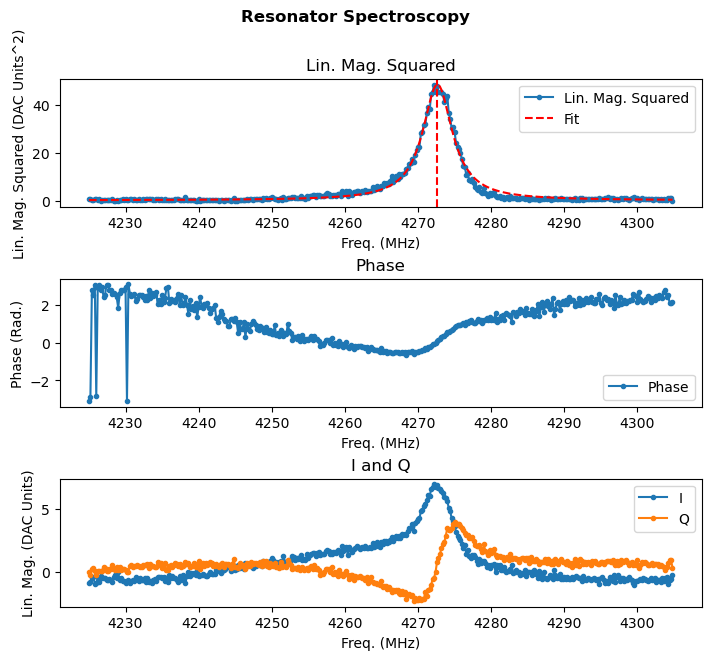

In [171]:
%load_ext autoreload
%autoreload
analysis = ResSpecAnalysis(freq, i_unwrap2, q_unwrap2)
analysis.analyze()

# Qubit Spectroscopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


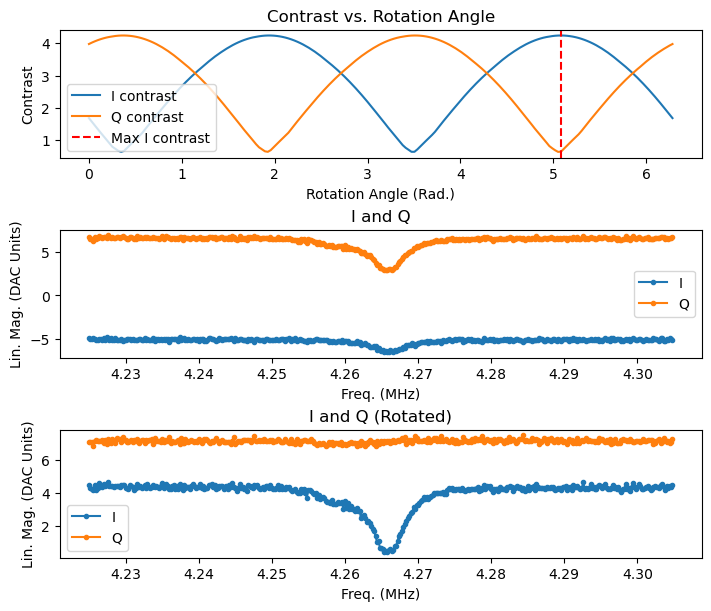

In [219]:
with h5py.File(data_path + '00020_qubit_spec.h5', 'r') as a:
    config = list(a['config'])
    freq = a['xpts'][0]/1e3
    I = a['avgi'][0]
    Q = a['avgq'][0]

%load_ext autoreload
%autoreload
i_rot, q_rot = iq_rotation(freq, I, Q)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Qubit Frequency (MHz): 4.265650753060011
Qubit HWHM (MHz): 0.002961266384289193
Pi-pulse time (expected) (us): 119.39263298601853


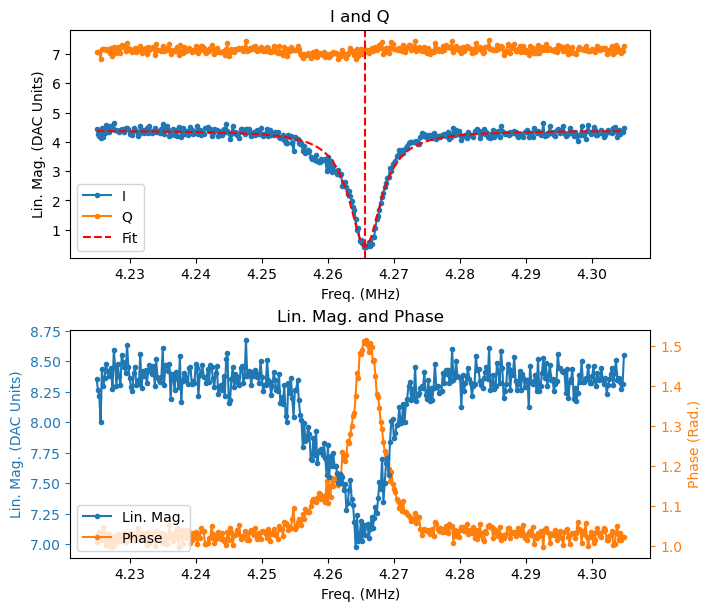

In [225]:
%load_ext autoreload
%autoreload
analysis = QubitSpecAnalysis(freq, i_rot, q_rot)
analysis.analyze()

# Length Rabi

In [199]:
with h5py.File(data_path + '00020_lenrabi.h5', 'r') as a:
    
    time = a['xpts'][0]
    I = a['avgi'][0]
    Q = a['avgq'][0]

    # I_rot = a['avgi_rot'][0]
    # Q_rot = a['avgq_rot'][0]
    
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


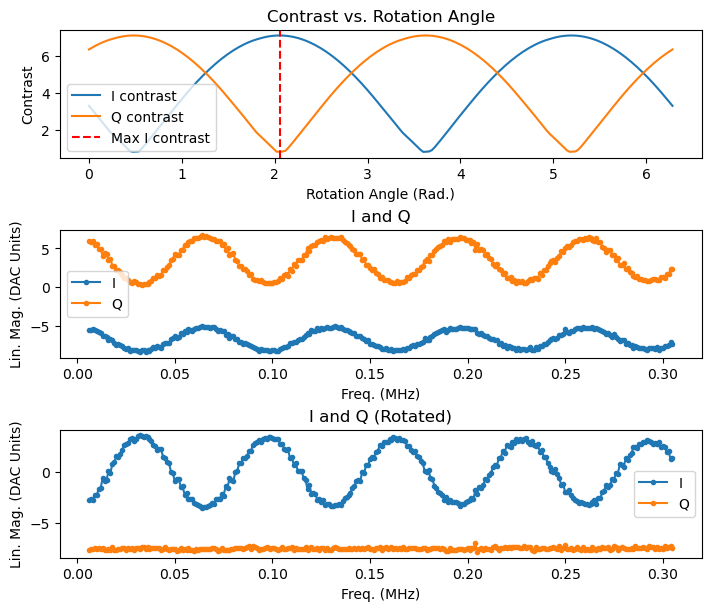

In [200]:
i_rot, q_rot = iq_rotation(time, I, Q)

Pi-pulse time (us): 0.03259887973819975
Pi/2-pulse time (us): 0.016299439869099874


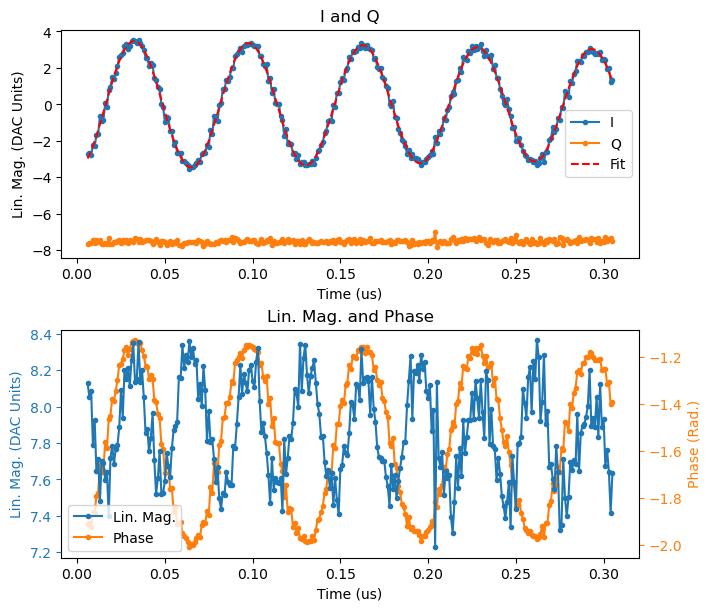

In [201]:
analysis = LengthRabiAnalysis(time, i_rot, q_rot)
analysis.analyze()

# T1

In [202]:
%load_ext autoreload
%autoreload

# Input 

data = h5py.File(data_path + '00006_t1.h5', 'r')

###

time = data['xpts'][0]
Q = data['avgq'][0]
I = data['avgi'][0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


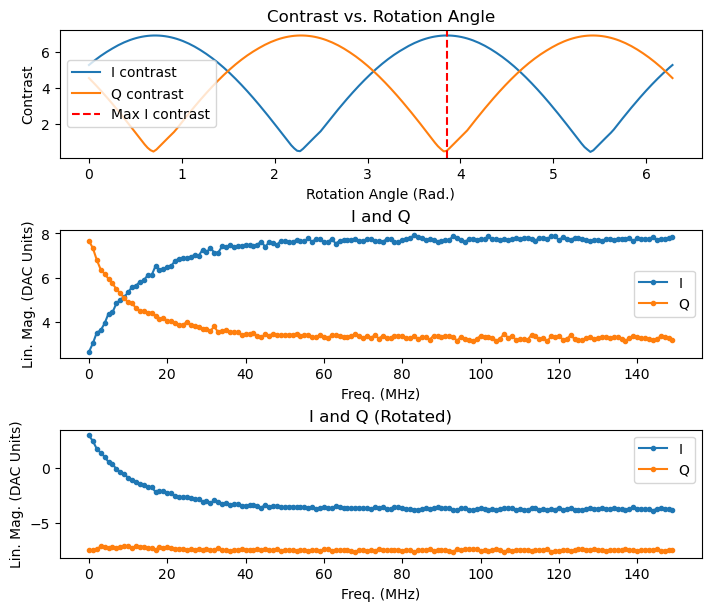

In [203]:
i_rot, q_rot = iq_rotation(time, I, Q)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
T1 (us): 12.87726160828207


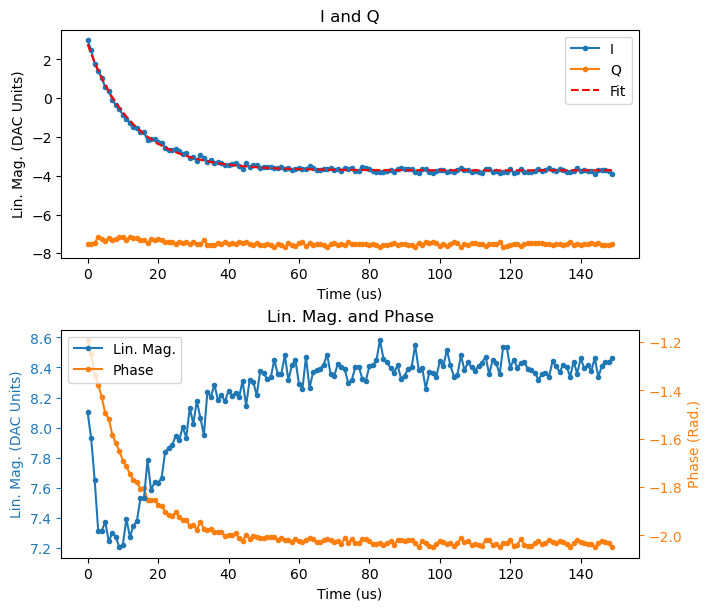

In [204]:
%load_ext autoreload
%autoreload

analysis = T1Analysis(time, i_rot, q_rot)
analysis.analyze()

# Phase Ramsey

In [235]:
with h5py.File(data_path + '00018_ramsey.h5', 'r') as a:

    time = a['xpts'][0][0:]
    Q = a['avgq'][0][0:]
    I = a['avgi'][0][0:]
    cfg = (json.loads(a.attrs['config']))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


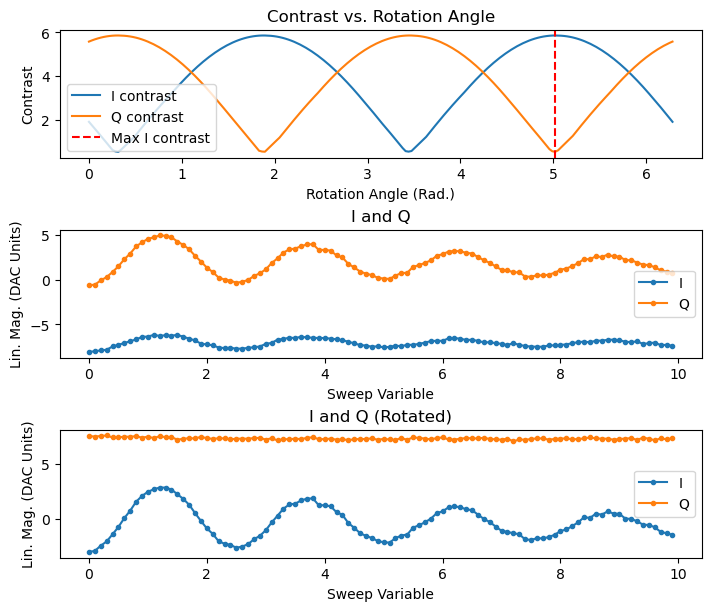

In [246]:
%load_ext autoreload
%autoreload
i_rot, q_rot = iq_rotation(time, I, Q)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Qubit Frequency Guess (MHz): 4265.967046327454
Offset (MHz): 0.005142758617920129
Suggested Qubit Frequency (MHz): 4265.972189086072
T2 (us): 7.973159967229843


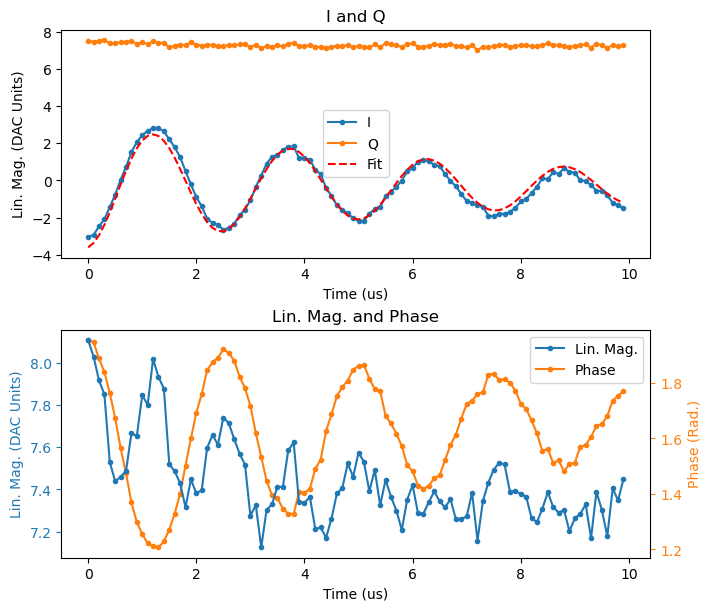

In [248]:
%load_ext autoreload
%autoreload

analysis = PhaseRamseyAnalysis(time, i_rot, q_rot, cfg)
analysis.analyze()

# EF Qubit Spectroscopy

In [249]:
data = h5py.File(data_path + '00002_ef_qubit_spec.h5', 'r')

freq = data['xpts'][0] 
avgq = data['avgq'][0]
avgi = data['avgi'][0]

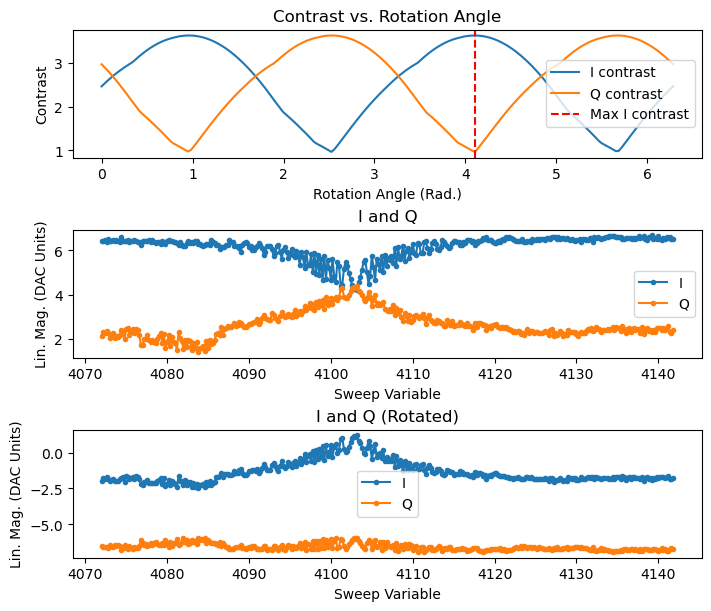

In [250]:
i_rot, q_rot = iq_rotation(freq, avgi, avgq)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Qubit Frequency (MHz): 4080.4015535310778
Qubit HWHM (MHz): 4.341912602639661
Pi-pulse time (expected) (us): 0.08142803021376602


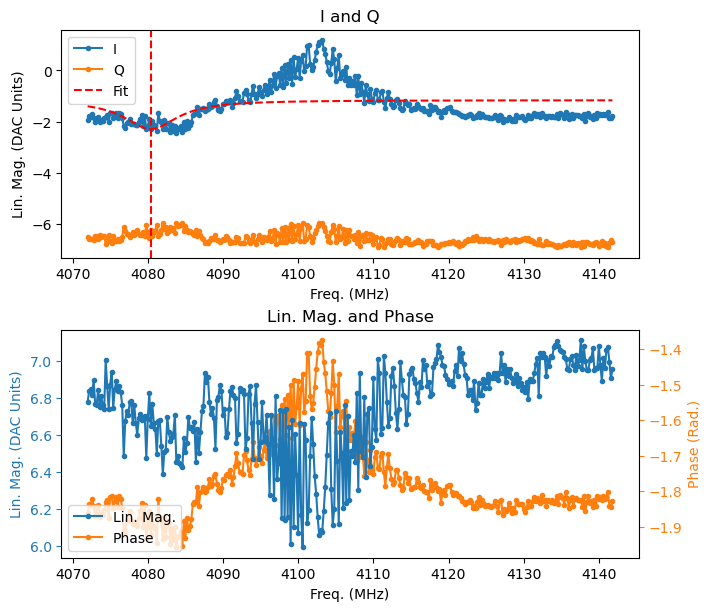

In [251]:
%load_ext autoreload
%autoreload

analysis = QubitSpecAnalysis(freq, i_rot, q_rot)
analysis.analyze()

Qubit EF Frequency (GHz): 4.102493888084341
Qubit EF HWHM (MHz): 6.84158226760575
Pi-pulse time (expected) (ns): 51.67713794326729
Qubit EF Frequency (GHz): 4.102088162739778
Qubit EF HWHM (MHz): 5.731556233985901
Pi-pulse time (expected) (ns): 61.68540901628768


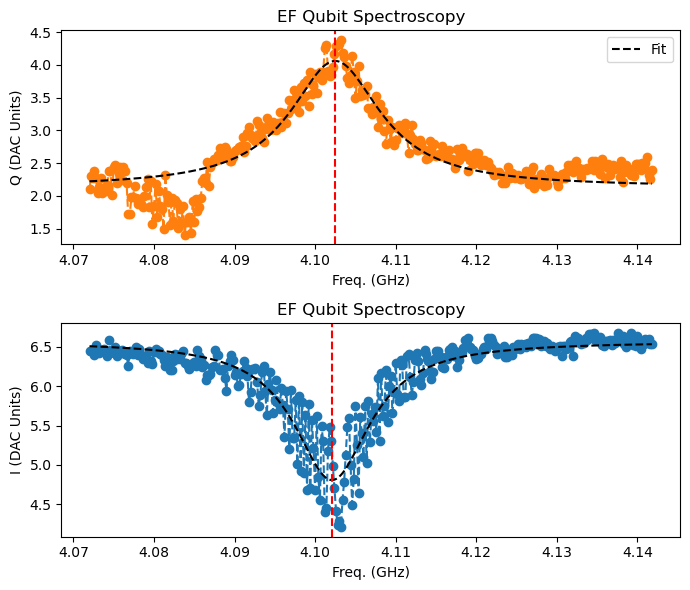

In [268]:
data = h5py.File(data_path + '00002_ef_qubit_spec.h5', 'r')

freq = data['xpts'][0]/1e3
avgq = data['avgq'][0]
avgi = data['avgi'][0]

# lin_mag = np.sqrt(avgq**2 + avgi**2)
lin_mag = avgq

fig,axs = plt.subplots(2,1,figsize = (7,6))

ax = axs[0]
ax.plot(freq, avgq, linestyle='--', marker='o', color='tab:orange')

p = dsf.fitlor(freq, avgq)
ax.plot(freq, dsf.lorfunc(p, freq), c='black', linestyle='--', label="Fit")

qubit_ef_freq = p[2]
qubit_ef_hwhm = p[3]

ax.axvline(qubit_ef_freq, linestyle='--', c='r')

print("Qubit EF Frequency (GHz):", p[2])
print("Qubit EF HWHM (MHz):", p[3]*1e3)
print("Pi-pulse time (expected) (ns):", 1/p[3]/2/np.sqrt(2))

ax.set_xlabel('Freq. (GHz)')
ax.set_ylabel('Q (DAC Units)')
ax.set_title('EF Qubit Spectroscopy')
ax.legend()

ax = axs[1]

ax.plot(freq, avgi, linestyle='--', marker='o', color='tab:blue')

p = dsf.fitlor(freq, -avgi)
ax.plot(freq, -dsf.lorfunc(p, freq), c='black', linestyle='--', label="Fit")

qubit_ef_freq = p[2]
qubit_ef_hwhm = p[3]

ax.axvline(qubit_ef_freq, linestyle='--', c='r')

print("Qubit EF Frequency (GHz):", p[2])
print("Qubit EF HWHM (MHz):", p[3]*1e3)
print("Pi-pulse time (expected) (ns):", 1/p[3]/2/np.sqrt(2))

ax.set_xlabel('Freq. (GHz)')
ax.set_ylabel('I (DAC Units)')
ax.set_title('EF Qubit Spectroscopy')

plt.tight_layout()

In [267]:
(4.102493888084341+4.102088162739778)/2

4.102291025412059

# EF Length Rabi

In [138]:
fit_freq = 7.589177289107443

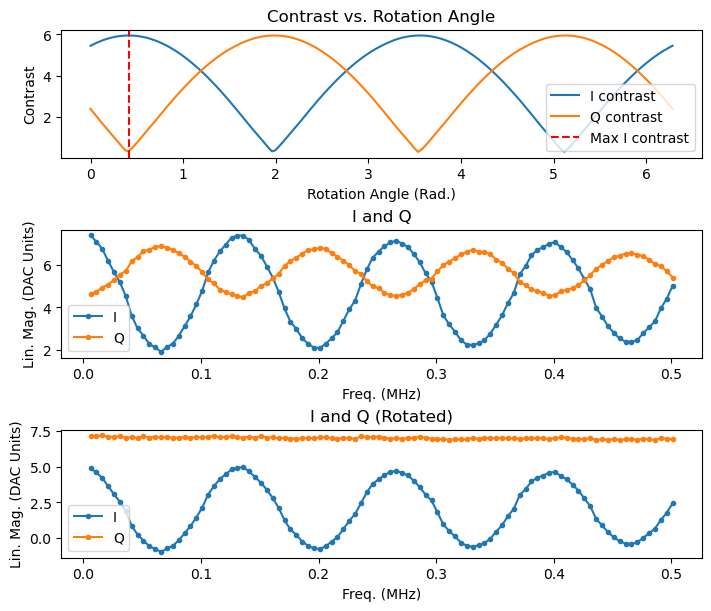

In [229]:
with h5py.File(data_path + '00007_ef_lenrabi.h5', 'r') as a:

    time = a['xpts'][0][0:]
    Q = a['avgq'][0][0:]
    I = a['avgi'][0][0:]

i_rot, q_rot = iq_rotation(time, I, Q)

Pi-pulse time (us): 0.06635456193342922
Pi/2-pulse time (us): 0.03317728096671461


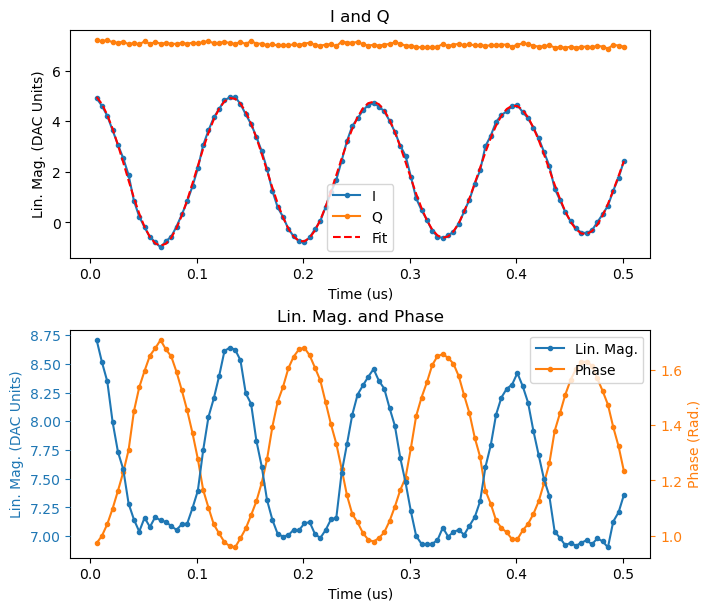

In [230]:
analysis = LengthRabiAnalysis(time, i_rot, q_rot)
analysis.analyze()

## Without $\pi$ pulse

Pi-pulse time (ns): 14.660345241739508
Osc. Freq (MHz): 34.10560882130174
Pi/2-pulse time (ns): 7.330172620869754
Pi-pulse time (ns): 73.12775828219198
Osc. Freq (MHz): 6.8373489321326515
Pi/2-pulse time (ns): 36.56387914109599


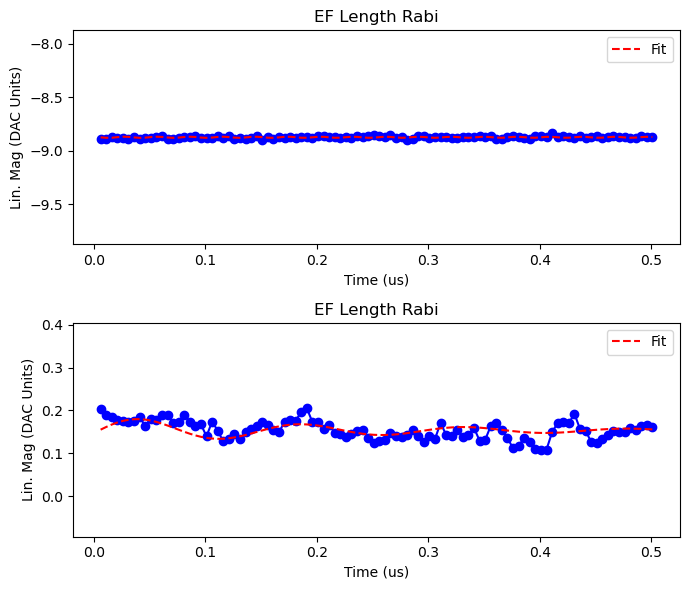

In [59]:
data = h5py.File(data_path + '00003_ef_lenrabi.h5', 'r')

time = data['xpts'][0]
avgq = data['avgq'][0]
avgi = data['avgi'][0]

lin_mag = np.sqrt(avgq**2 + avgi**2)
lin_mag_centered = 5*(lin_mag - np.mean(lin_mag))

fig,axs = plt.subplots(2,1,figsize = (7,6))

ax = axs[0]
y = avgi
ax.plot(time, y, 'bo-')
p = dsf.fitdecaysin(time, y)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]

time_pi = 1 / (2 * p[1])
time_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", time_pi*1e3)
print("Osc. Freq (MHz):", 1/(2*time_pi))
print("Pi/2-pulse time (ns):", time_half_pi*1e3)

ax.set_xlabel('Time (us)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_title('EF Length Rabi')
ax.legend()
ax.set_ylim(np.mean(y)-1,np.mean(y)+1)

ax = axs[1]
y = avgq
ax.plot(time, y, 'bo-')
p = dsf.fitdecaysin(time, y)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]

time_pi = 1 / (2 * p[1])
time_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", time_pi*1e3)
print("Osc. Freq (MHz):", 1/(2*time_pi))
print("Pi/2-pulse time (ns):", time_half_pi*1e3)

ax.set_xlabel('Time (us)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_title('EF Length Rabi')
ax.set_ylim(np.mean(y)-0.25,np.mean(y)+0.25)
ax.legend()

data['config'][0]
plt.tight_layout()


## Rotating I and Q to maximize contrast

In [60]:
amps = []

Pi-pulse time (ns): 65.9447875487776
Osc. Freq (MHz): 7.582100399219018
Pi/2-pulse time (ns): 32.9723937743888


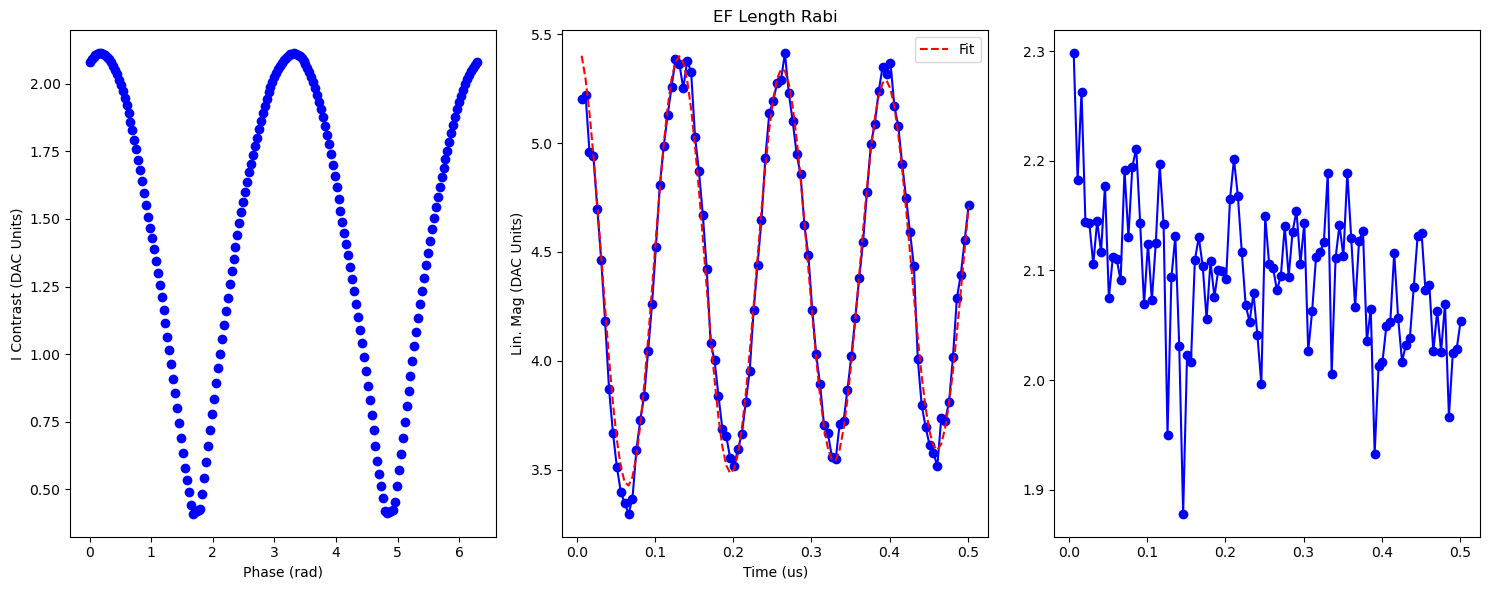

In [61]:
data = h5py.File(data_path + '00001_ef_lenrabi.h5', 'r')

time = data['xpts'][0]

I = data['avgi'][0]
Q = data['avgq'][0]

phis = np.linspace(0, 2*np.pi, 200)
I_rots = np.array([I*np.cos(phi) + Q*np.sin(phi) for phi in phis])  
# contrasts = []
# for I_rot in I_rots:
#     p = dsf.fitdecaysin(time, I_rot,showfit=False)
#     contrasts.append(p[0])

# contrasts = np.array(contrasts)
contrasts = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots])

fig,axs = plt.subplots(1,3,figsize = (15,6))

ax = axs[0]
ax.plot(phis,contrasts,'bo')
ax.set_xlabel('Phase (rad)')
ax.set_ylabel('I Contrast (DAC Units)')

phi = phis[np.argmax(contrasts)]
I_rot = I*np.cos(phi) + Q*np.sin(phi)
Q_rot = -I*np.sin(phi) + Q*np.cos(phi)


ax = axs[1]
y = I_rot
ax.plot(time, y, 'bo-')
p = dsf.fitdecaysin(time, y)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]

time_pi = 1 / (2 * p[1])
time_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", time_pi*1e3)
print("Osc. Freq (MHz):", 1/(2*time_pi))
print("Pi/2-pulse time (ns):", time_half_pi*1e3)

amps.append(p[0])

ax.set_xlabel('Time (us)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_title('EF Length Rabi')
ax.legend()

ax = axs[2]
y = Q_rot
ax.plot(time, y, 'bo-')



data['config'][0]

plt.tight_layout()

Pi-pulse time (ns): 73.24647086527663
Osc. Freq (MHz): 6.826267451433362
Pi/2-pulse time (ns): 36.62323543263832


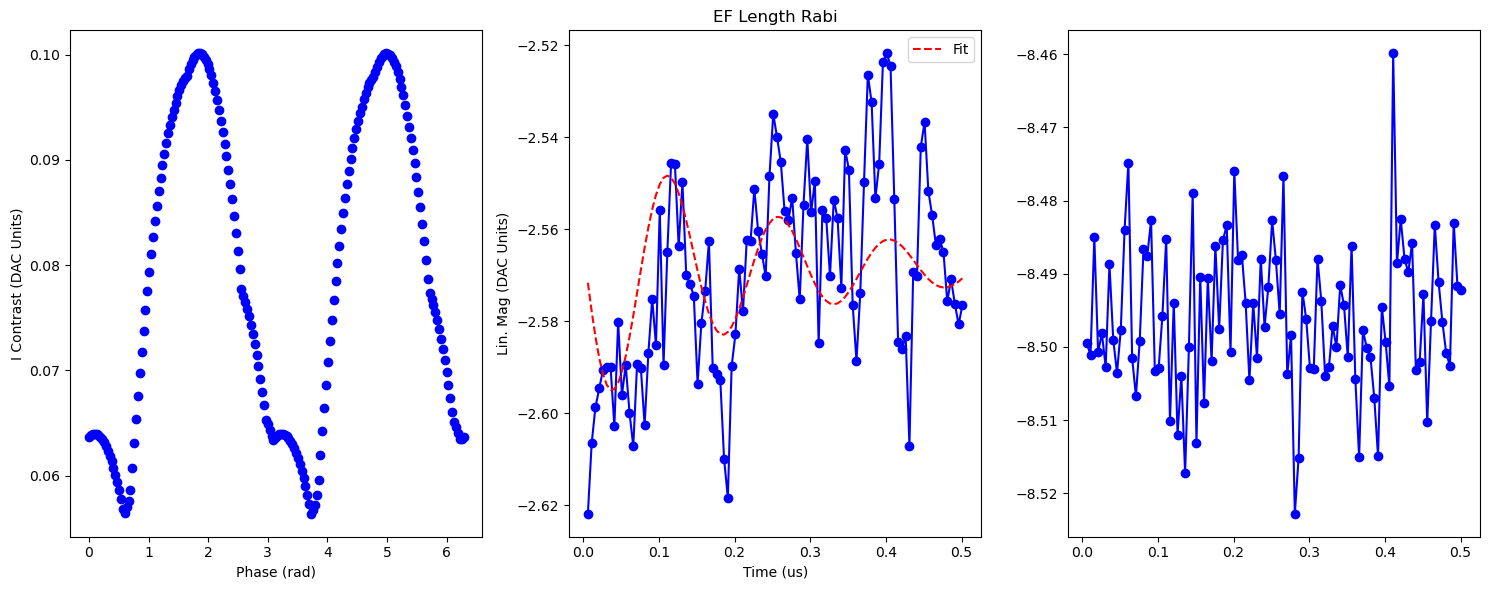

In [62]:
data = h5py.File(data_path + '00003_ef_lenrabi.h5', 'r')

time = data['xpts'][0]

I = data['avgi'][0]
Q = data['avgq'][0]

phis = np.linspace(0, 2*np.pi, 200)
I_rots = np.array([I*np.cos(phi) + Q*np.sin(phi) for phi in phis])  
# contrasts = []
# for I_rot in I_rots:
#     p = dsf.fitdecaysin(time, I_rot,showfit=False)
#     contrasts.append(p[0])

# contrasts = np.array(contrasts)
contrasts = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots])

fig,axs = plt.subplots(1,3,figsize = (15,6))

ax = axs[0]
ax.plot(phis,contrasts,'bo')
ax.set_xlabel('Phase (rad)')
ax.set_ylabel('I Contrast (DAC Units)')

phi = phis[np.argmax(contrasts)]
I_rot = I*np.cos(phi) + Q*np.sin(phi)
Q_rot = -I*np.sin(phi) + Q*np.cos(phi)


ax = axs[1]
y = I_rot
ax.plot(time, y, 'bo-')
p = dsf.fitdecaysin(time, y)
ax.plot(time, dsf.decaysin(p, time), c='r', linestyle='--', label="Fit")

osc_freq = p[1]

time_pi = 1 / (2 * p[1])
time_half_pi = 1 / (4 * p[1])

print("Pi-pulse time (ns):", time_pi*1e3)
print("Osc. Freq (MHz):", 1/(2*time_pi))
print("Pi/2-pulse time (ns):", time_half_pi*1e3)

amps.append(p[0])

ax.set_xlabel('Time (us)')
ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_title('EF Length Rabi')
ax.legend()

ax = axs[2]
y = Q_rot
ax.plot(time, y, 'bo-')



data['config'][0]

plt.tight_layout()

In [63]:
amps

[-1.0278660581299008, -0.030679329023769953]

# Qubit temperature using Length Rabi

In [64]:
def temperature_q(nu, rat):
            Kb = 1.38e-23
            h = 2 * np.pi * 1.054e-34
            return h * nu / (Kb * np.log(1 / rat))

def occupation_q(nu, T):
    Kb = 1.38e-23
    h = 2 * np.pi * 1.054e-34
    return 1 / (np.exp(h * nu / (Kb * T)) + 1)

In [65]:
ratio = abs(amps[1]/amps[0])

nu_q = 4289.822637748332

print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


ge contrast ratio from I data =  0.029847594227975494
Qubit Temp: 58.62318057063857  mK
Qubit Excited State Occupation: 0.02898253527537803


## New Qubit temperature data

### DATAset 1

ge contrast ratio from I data =  23.19570095030455
Qubit Temp: -65.47910829287468  mK
Qubit Excited State Occupation: 0.9586703438741496
ge contrast ratio from I data =  3.5693018453131042
Qubit Temp: -161.79582231603382  mK
Qubit Excited State Occupation: 0.7811481854660717
ge contrast ratio from I data =  0.028698570080294184
Qubit Temp: 57.97507398726567  mK
Qubit Excited State Occupation: 0.027897939119380856


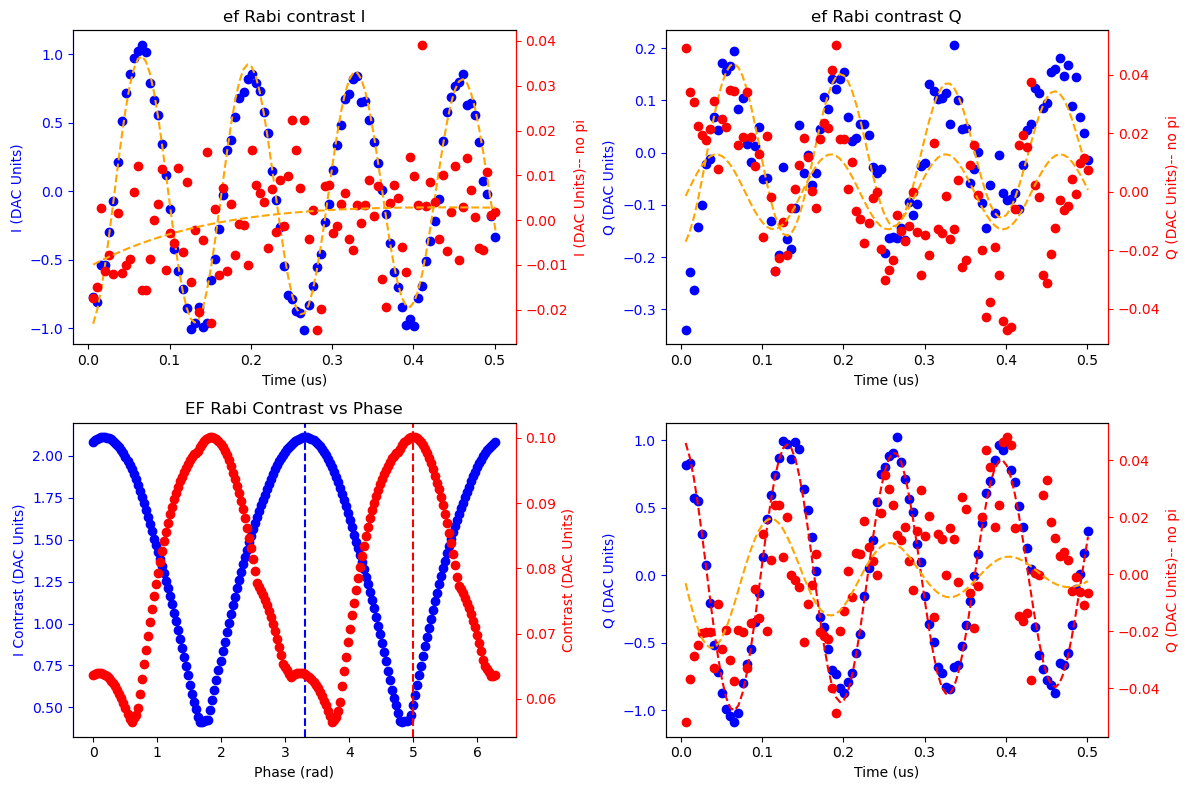

In [230]:
with h5py.File(data_path + '00001_ef_lenrabi.h5', 'r') as a:
    time = a['xpts'][0]
    I = a['avgi'][0]
    Q = a['avgq'][0]
    config1 = list(a['config'])


with h5py.File(data_path + '00003_ef_lenrabi.h5', 'r') as a:
    time = a['xpts'][0]
    I_no_pi = a['avgi'][0]
    Q_no_pi = a['avgq'][0]
    config2 = list(a['config'])

I = I - np.mean(I)
Q = Q - np.mean(Q)
I_no_pi = I_no_pi - np.mean(I_no_pi)
Q_no_pi = Q_no_pi - np.mean(Q_no_pi)

fig,axs = plt.subplots(2,2,figsize = (12,8))

axs = axs.flatten()

for ii,ax in enumerate(axs[:2]):
    if ii == 0:
        y1 = I
        y2 = I_no_pi
        title = 'ef Rabi contrast I'
        ylabel = 'I (DAC Units)'
    else:
        y1 = Q
        y2 = Q_no_pi
        title = 'ef Rabi contrast Q'
        ylabel = 'Q (DAC Units)'
        
    ax.plot(time, y1, 'bo')
    p1 = dsf.fitdecaysin(time,y1, showfit=False)
    ax.plot(time, dsf.decaysin(p1, time), c='orange', linestyle='--')
    ax.spines['left'].set_color('b')
    ax.set_ylabel(ylabel, color='b')
    ax.tick_params('y', colors='b')

    p_guess = p1
    p_guess[0] = p_guess[0]*0.02

    ax2 = ax.twinx()
    
    ax2.plot(time, y2, 'o',color = 'r')
    p2 = dsf.fitdecaysin(time,y2, showfit=False,fitparams=p_guess)
    ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')

    ax2.spines['right'].set_color('r')
    ax2.set_ylabel(ylabel + '-- no pi', color='r')
    ax2.tick_params('y', colors='r')


    nu_q = 4289.822637748332

    ratio = abs(p2[0] / p1[0])
    print("ge contrast ratio from I data = ", ratio)
    print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
    print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


    ax.set_ylabel(ylabel)
    ax.set_xlabel('Time (us)')
    ax.set_title(title)


phis = np.linspace(0, 2*np.pi, 200)
I_rots = np.array([I*np.cos(phi) + Q*np.sin(phi) for phi in phis])  
contrasts = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots])
I_rots_no_pi = np.array([I_no_pi*np.cos(phi) + Q_no_pi*np.sin(phi) for phi in phis])
contrasts_no_pi = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots_no_pi])

ax = axs[2]
ax.plot(phis,contrasts,'bo')
ax.spines['left'].set_color('b')
ax.set_ylabel('Contrast (DAC Units)', color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(phis,contrasts_no_pi,'ro')
ax2.spines['right'].set_color('r')
ax2.set_ylabel('Contrast (DAC Units)', color='r')
ax2.tick_params('y', colors='r')

phi_max = phis[np.argmax(contrasts)]
phi_max_no_pi = phis[np.argmax(contrasts_no_pi)]

ax.axvline(phi_max, linestyle='--', c='b', label='Peak')
ax.axvline(phi_max_no_pi, linestyle='--', c='r', label='Peak')

ax.set_xlabel('Phase (rad)')
ax.set_ylabel('I Contrast (DAC Units)')
ax.set_title('EF Rabi Contrast vs Phase')




I_rot = I*np.cos(phi_max) + Q*np.sin(phi_max)
I_nopi_rot = I_no_pi*np.cos(phi_max_no_pi) + Q_no_pi*np.sin(phi_max_no_pi)
Q_rot = -I*np.sin(phi_max) + Q*np.cos(phi_max)
Q_nopi_rot = -I_no_pi*np.sin(phi_max_no_pi) + Q_no_pi*np.cos(phi_max_no_pi)

ax = axs[3]

y1 = I_rot
y2 = I_nopi_rot
title = 'ef Rabi contrast after rotation'
ylabel = 'Q (DAC Units)'
    
ax.plot(time, y1, 'bo')
p1 = dsf.fitdecaysin(time,y1, showfit=False)
ax.plot(time, dsf.decaysin(p1, time), c='r', linestyle='--')
ax.spines['left'].set_color('b')
ax.set_ylabel(ylabel, color='b')
ax.tick_params('y', colors='b')


ax2 = ax.twinx()
ax2.plot(time, y2, 'ro')
p2 = dsf.fitdecaysin(time,y2, showfit=False)
ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')
ax2.spines['right'].set_color('r')
ax2.set_ylabel(ylabel + '-- no pi', color='r')
ax2.tick_params('y', colors='r')



nu_q = 4289.822637748332

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


ax.set_ylabel(ylabel)
ax.set_xlabel('Time (us)')




plt.tight_layout()




In [231]:
config2

[b"{'device': {'soc': {'resonator': {'ch': 4, 'nyqist': 1, 'res_phase': 0, 'gain': 500, 'freq': 286.86808692831, 'phase': 0}, 'readout': {'ch': [0], 'nyqist': 1, 'length': 1, 'readout_length': 1, 'adc_trig_offset': 60, 'lo': 7000, 'relax_delay': 50, 'freq': 286.86808692831, 'phase': 0}, 'qubit': {'ch': 6, 'nyqist': 1, 'f_ge': 4265.971503638741, 'f_ef': 4101.682361196493, 'pulses': {'pi_ge': {'gain': 3000, 'sigma': 0.191095}, 'pi2_ge': {'gain': 4800, 'sigma': 0.0792899}}}}}, 'aliases': {'soc': 'myqick', 'readout_lo': 'MXG1'}, 'expt': {'start': 0.006, 'step': 0.005, 'expts': 100, 'reps': 480000, 'gain': 6000, 'pulse_type': 'const', 'length_placeholder': 0.501, 'pi_qubit': 0, 'ge_pi_after': 1}, 'start': 0.006, 'step': 0.005, 'expts': 100, 'reps': 480000, 'gain': 6000, 'pulse_type': 'const', 'length_placeholder': 0.501, 'pi_qubit': 0, 'ge_pi_after': 1}"]

### Data set 2

Readout frequency 7.286096845090712 GHz
ge contrast ratio from I data =  0.007945164228077423
Qubit Temp: 42.57621228647377  mK
Qubit Excited State Occupation: 0.00788253618356524
ge contrast ratio from I data =  0.020422828284571592
Qubit Temp: 52.90638859208936  mK
Qubit Excited State Occupation: 0.020014084082090093
ge contrast ratio from I data =  0.006628482899921072
Qubit Temp: 41.038394341985416  mK
Qubit Excited State Occupation: 0.006584835430868765


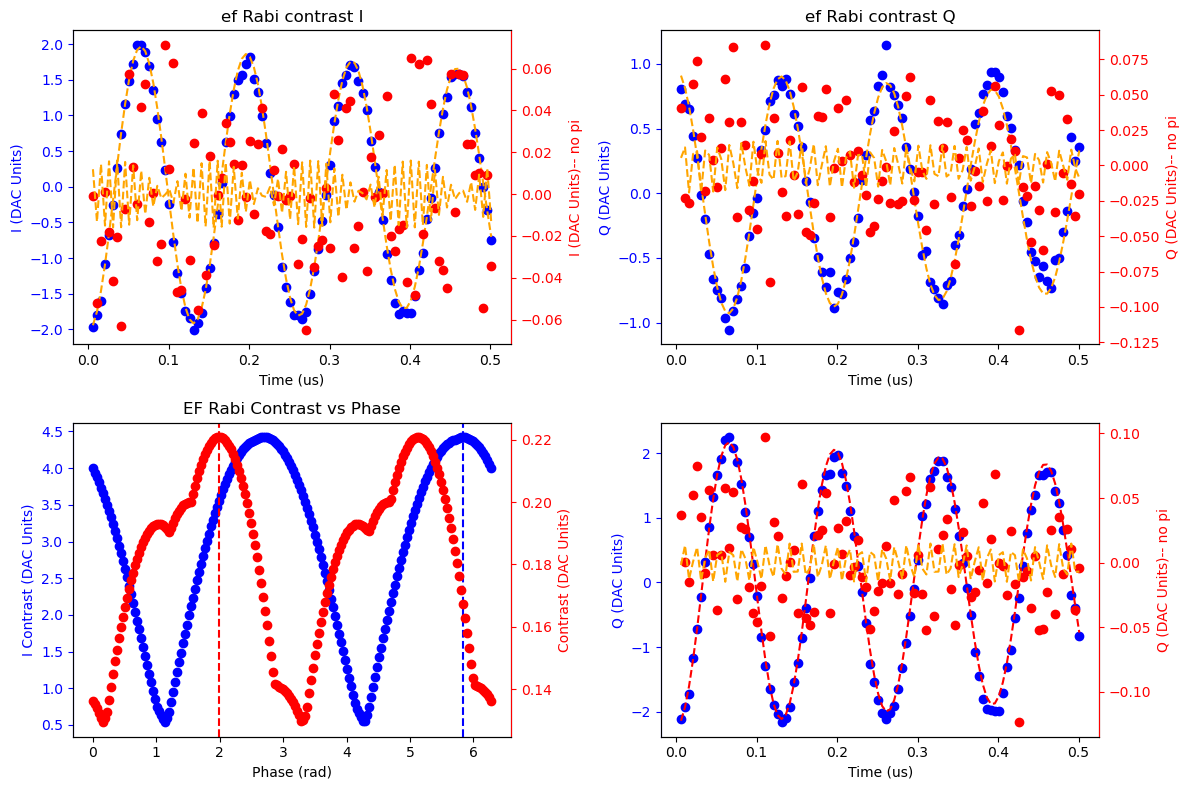

In [226]:
with h5py.File(data_path + '00004_ef_lenrabi.h5', 'r') as a:
    time = a['xpts'][0]
    I = a['avgi'][0]
    Q = a['avgq'][0]
    cfg = (json.loads(a.attrs['config']))
    nu_r = cfg['device']['soc']['readout']['freq']
    print ("Readout frequency",(nu_r+ 7000)/1e3,"GHz")


# With final pi
# with h5py.File(data_path + '00005_ef_lenrabi.h5', 'r') as a:
# Without final pi
with h5py.File(data_path + '00006_ef_lenrabi.h5', 'r') as a:

    time = a['xpts'][0]
    I_no_pi = a['avgi'][0]
    Q_no_pi = a['avgq'][0]

I = I - np.mean(I)
Q = Q - np.mean(Q)
I_no_pi = I_no_pi - np.mean(I_no_pi)
Q_no_pi = Q_no_pi - np.mean(Q_no_pi)

fig,axs = plt.subplots(2,2,figsize = (12,8))

axs = axs.flatten()

for ii,ax in enumerate(axs[:2]):
    if ii == 0:
        y1 = I
        y2 = I_no_pi
        title = 'ef Rabi contrast I'
        ylabel = 'I (DAC Units)'
    else:
        y1 = Q
        y2 = Q_no_pi
        title = 'ef Rabi contrast Q'
        ylabel = 'Q (DAC Units)'
        
    ax.plot(time, y1, 'bo')
    p1 = dsf.fitdecaysin(time,y1, showfit=False)
    ax.plot(time, dsf.decaysin(p1, time), c='orange', linestyle='--')
    ax.spines['left'].set_color('b')
    ax.set_ylabel(ylabel, color='b')
    ax.tick_params('y', colors='b')

    ax2 = ax.twinx()
    
    ax2.plot(time, y2, 'o',color = 'r')
    p2 = dsf.fitdecaysin(time,y2, showfit=False)
    ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')

    ax2.spines['right'].set_color('r')
    ax2.set_ylabel(ylabel + '-- no pi', color='r')
    ax2.tick_params('y', colors='r')


    nu_q = 4289.822637748332

    ratio = abs(p2[0] / p1[0])
    print("ge contrast ratio from I data = ", ratio)
    print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
    print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


    ax.set_ylabel(ylabel)
    ax.set_xlabel('Time (us)')
    ax.set_title(title)


phis = np.linspace(0, 2*np.pi, 200)
I_rots = np.array([I*np.cos(phi) + Q*np.sin(phi) for phi in phis])  
contrasts = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots])
I_rots_no_pi = np.array([I_no_pi*np.cos(phi) + Q_no_pi*np.sin(phi) for phi in phis])
contrasts_no_pi = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots_no_pi])

ax = axs[2]
ax.plot(phis,contrasts,'bo')
ax.spines['left'].set_color('b')
ax.set_ylabel('Contrast (DAC Units)', color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(phis,contrasts_no_pi,'ro')
ax2.spines['right'].set_color('r')
ax2.set_ylabel('Contrast (DAC Units)', color='r')
ax2.tick_params('y', colors='r')

phi_max = phis[np.argmax(contrasts)]
phi_max_no_pi = phis[np.argmax(contrasts_no_pi)]

ax.axvline(phi_max, linestyle='--', c='b', label='Peak')
ax.axvline(phi_max_no_pi, linestyle='--', c='r', label='Peak')

ax.set_xlabel('Phase (rad)')
ax.set_ylabel('I Contrast (DAC Units)')
ax.set_title('EF Rabi Contrast vs Phase')




I_rot = I*np.cos(phi_max) + Q*np.sin(phi_max)
I_nopi_rot = I_no_pi*np.cos(phi_max_no_pi) + Q_no_pi*np.sin(phi_max_no_pi)
Q_rot = -I*np.sin(phi_max) + Q*np.cos(phi_max)
Q_nopi_rot = -I_no_pi*np.sin(phi_max_no_pi) + Q_no_pi*np.cos(phi_max_no_pi)

ax = axs[3]

y1 = I_rot
y2 = I_nopi_rot
title = 'ef Rabi contrast after rotation'
ylabel = 'Q (DAC Units)'
    
ax.plot(time, y1, 'bo')
p1 = dsf.fitdecaysin(time,y1, showfit=False)
ax.plot(time, dsf.decaysin(p1, time), c='r', linestyle='--')
ax.spines['left'].set_color('b')
ax.set_ylabel(ylabel, color='b')
ax.tick_params('y', colors='b')


ax2 = ax.twinx()
ax2.plot(time, y2, 'ro')
p2 = dsf.fitdecaysin(time,y2, showfit=False)
ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')
ax2.spines['right'].set_color('r')
ax2.set_ylabel(ylabel + '-- no pi', color='r')
ax2.tick_params('y', colors='r')



nu_q = 4289.822637748332

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


ax.set_ylabel(ylabel)
ax.set_xlabel('Time (us)')




plt.tight_layout()




## Old qubit temperature data

ge contrast ratio from I data =  0.015212009689439476
Qubit Temp: 49.183081880046785  mK
Qubit Excited State Occupation: 0.014984071843370868
ge contrast ratio from I data =  0.018604364627285826
Qubit Temp: 51.66807241857837  mK
Qubit Excited State Occupation: 0.018264564018526747
ge contrast ratio from I data =  0.01799561643105021
Qubit Temp: 51.24023426476162  mK
Qubit Excited State Occupation: 0.017677498940653902


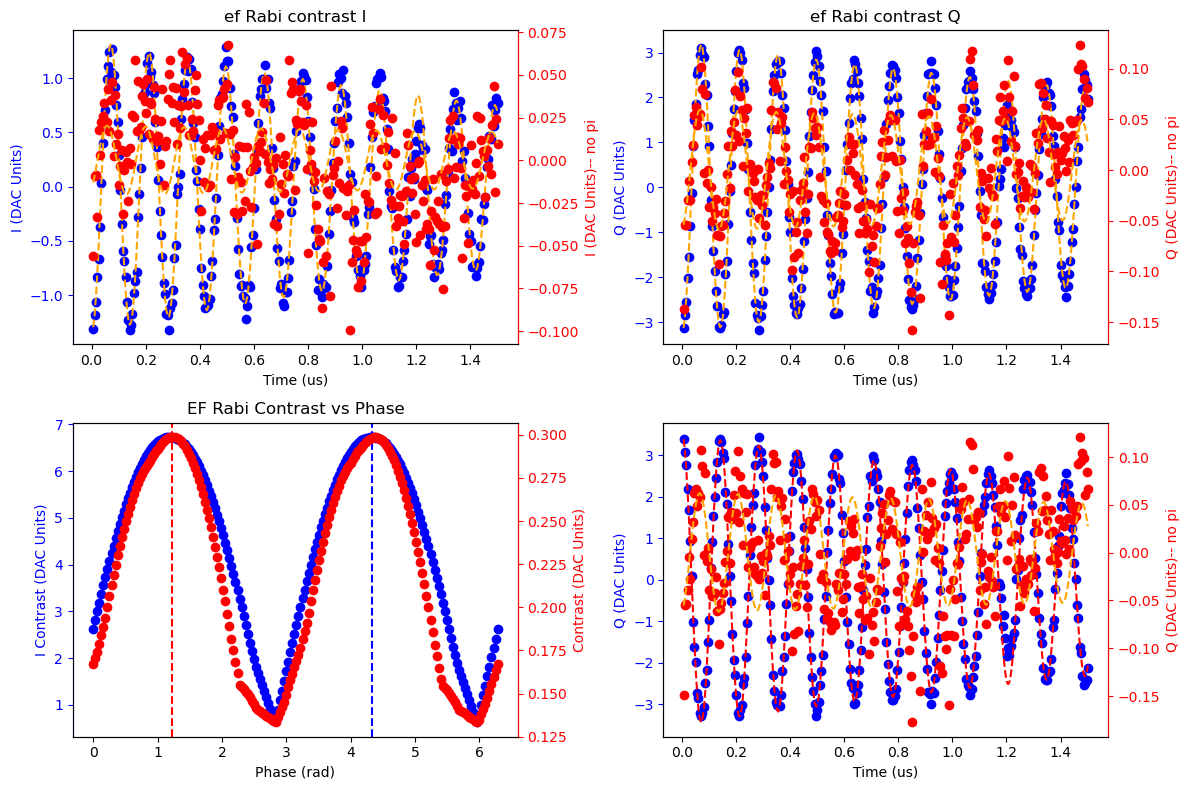

In [220]:
with h5py.File(data_path_old + '00033_ef_lenrabi.h5', 'r') as a:
    time = a['xpts'][0]
    I = a['avgi'][0]
    Q = a['avgq'][0]


with h5py.File(data_path_old + '00037_ef_lenrabi.h5', 'r') as a:
    time = a['xpts'][0]
    I_no_pi = a['avgi'][0]
    Q_no_pi = a['avgq'][0]

I = I - np.mean(I)
Q = Q - np.mean(Q)
I_no_pi = I_no_pi - np.mean(I_no_pi)
Q_no_pi = Q_no_pi - np.mean(Q_no_pi)

fig,axs = plt.subplots(2,2,figsize = (12,8))

axs = axs.flatten()

for ii,ax in enumerate(axs[:2]):
    if ii == 0:
        y1 = I
        y2 = I_no_pi
        title = 'ef Rabi contrast I'
        ylabel = 'I (DAC Units)'
    else:
        y1 = Q
        y2 = Q_no_pi
        title = 'ef Rabi contrast Q'
        ylabel = 'Q (DAC Units)'
        
    ax.plot(time, y1, 'bo')
    p1 = dsf.fitdecaysin(time,y1, showfit=False)
    ax.plot(time, dsf.decaysin(p1, time), c='orange', linestyle='--')
    ax.spines['left'].set_color('b')
    ax.set_ylabel(ylabel, color='b')
    ax.tick_params('y', colors='b')

    ax2 = ax.twinx()
    
    ax2.plot(time, y2, 'o',color = 'r')
    p2 = dsf.fitdecaysin(time,y2, showfit=False)
    ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')

    ax2.spines['right'].set_color('r')
    ax2.set_ylabel(ylabel + '-- no pi', color='r')
    ax2.tick_params('y', colors='r')


    nu_q = 4289.822637748332

    ratio = abs(p2[0] / p1[0])
    print("ge contrast ratio from I data = ", ratio)
    print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
    print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


    ax.set_ylabel(ylabel)
    ax.set_xlabel('Time (us)')
    ax.set_title(title)


phis = np.linspace(0, 2*np.pi, 200)
I_rots = np.array([I*np.cos(phi) + Q*np.sin(phi) for phi in phis])  
contrasts = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots])
I_rots_no_pi = np.array([I_no_pi*np.cos(phi) + Q_no_pi*np.sin(phi) for phi in phis])
contrasts_no_pi = np.array([(np.max(I_rot) - np.min(I_rot)) for I_rot in I_rots_no_pi])

ax = axs[2]
ax.plot(phis,contrasts,'bo')
ax.spines['left'].set_color('b')
ax.set_ylabel('Contrast (DAC Units)', color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(phis,contrasts_no_pi,'ro')
ax2.spines['right'].set_color('r')
ax2.set_ylabel('Contrast (DAC Units)', color='r')
ax2.tick_params('y', colors='r')

phi_max = phis[np.argmax(contrasts)]
phi_max_no_pi = phis[np.argmax(contrasts_no_pi)]

ax.axvline(phi_max, linestyle='--', c='b', label='Peak')
ax.axvline(phi_max_no_pi, linestyle='--', c='r', label='Peak')

ax.set_xlabel('Phase (rad)')
ax.set_ylabel('I Contrast (DAC Units)')
ax.set_title('EF Rabi Contrast vs Phase')




I_rot = I*np.cos(phi_max) + Q*np.sin(phi_max)
I_nopi_rot = I_no_pi*np.cos(phi_max_no_pi) + Q_no_pi*np.sin(phi_max_no_pi)
Q_rot = -I*np.sin(phi_max) + Q*np.cos(phi_max)
Q_nopi_rot = -I_no_pi*np.sin(phi_max_no_pi) + Q_no_pi*np.cos(phi_max_no_pi)

ax = axs[3]

y1 = I_rot
y2 = I_nopi_rot
title = 'ef Rabi contrast after rotation'
ylabel = 'Q (DAC Units)'
    
ax.plot(time, y1, 'bo')
p1 = dsf.fitdecaysin(time,y1, showfit=False)
ax.plot(time, dsf.decaysin(p1, time), c='r', linestyle='--')
ax.spines['left'].set_color('b')
ax.set_ylabel(ylabel, color='b')
ax.tick_params('y', colors='b')


ax2 = ax.twinx()
ax2.plot(time, y2, 'ro')
p2 = dsf.fitdecaysin(time,y2, showfit=False)
ax2.plot(time, dsf.decaysin(p2, time), c='orange', linestyle='--')
ax2.spines['right'].set_color('r')
ax2.set_ylabel(ylabel + '-- no pi', color='r')
ax2.tick_params('y', colors='r')



nu_q = 4289.822637748332

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))


ax.set_ylabel(ylabel)
ax.set_xlabel('Time (us)')




plt.tight_layout()



ge contrast ratio from I data =  1.0000007904680046
Qubit Temp: -260433354.73569992  mK
Qubit Excited State Occupation: 0.500000197616923
[-6.00985608e-02  7.08384667e+00  1.00582110e+02  7.49818733e+00
 -1.03028697e-15  6.00000000e-03] [-6.00986084e-02  7.08384667e+00  1.00582109e+02  7.49812285e+00
 -1.03028697e-15  6.00000000e-03]


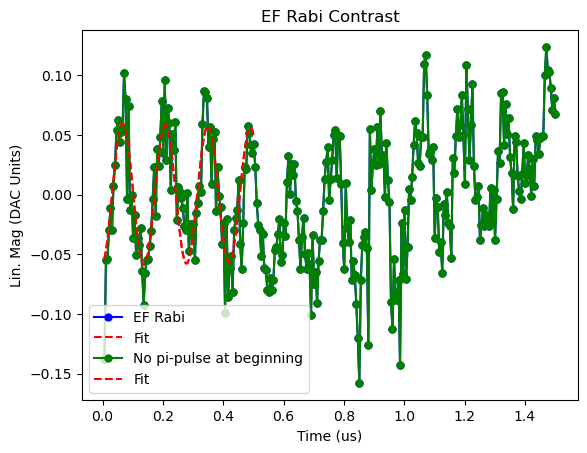

In [68]:
data_path_old = 'S:\\_Data\\20230508_Cooldown2_Transmon_NIST_JPA\\qick_exp\\data\\'
result_dict = h5py.File(data_path_old + '00033_ef_lenrabi.h5', 'r')

Q = result_dict['avgq'][0]
I = result_dict['avgi'][0]
# mag_pi = np.sqrt(avgq**2 + avgi**2)
mag_pi = avgq
mag_pi = mag_pi-np.mean(mag_pi)
time_pts_1 = result_dict['xpts'][0]

result_dict = h5py.File(data_path_old + '00037_ef_lenrabi.h5', 'r')

avgq = result_dict['avgq'][0]
avgi = result_dict['avgi'][0]
# mag_nopi = np.sqrt(avgq**2 + avgi**2)
mag_nopi = avgq
mag_nopi = mag_nopi-np.mean(mag_nopi)
time_pts_2 = result_dict['xpts'][0]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time_pts_1, mag_pi, 'bo-', ms=5, label='EF Rabi')
p1 = dsf.fitdecaysin(time_pts_1, mag_pi, showfit=False)
ax.plot(time, dsf.decaysin(p1, time), c='r', linestyle='--', label="Fit")

ax.plot(time_pts_2, mag_nopi, 'go-', ms=5, label='No pi-pulse at beginning')
p2 = dsf.fitdecaysin_const_freq(time_pts_2, mag_nopi, freq=p1[1], showfit=False)
ax.plot(time, dsf.decaysin(p2, time), c='r', linestyle='--', label="Fit")


nu_q = 4289.822637748332

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))

# p = fitdecaysin(time_pts, mag, showfit=True)
# t_pi = 1 / (2 * p[1])
# t_half_pi = 1 / (4 * p[1])

# print("Pi-pulse time:", t_pi)

ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_xlabel('Time (us)')
ax.set_title('EF Rabi Contrast')
# ax.set_ylim(-0.1,0.1)
ax.legend()

print(p1, p2)

<IPython.core.display.Javascript object>


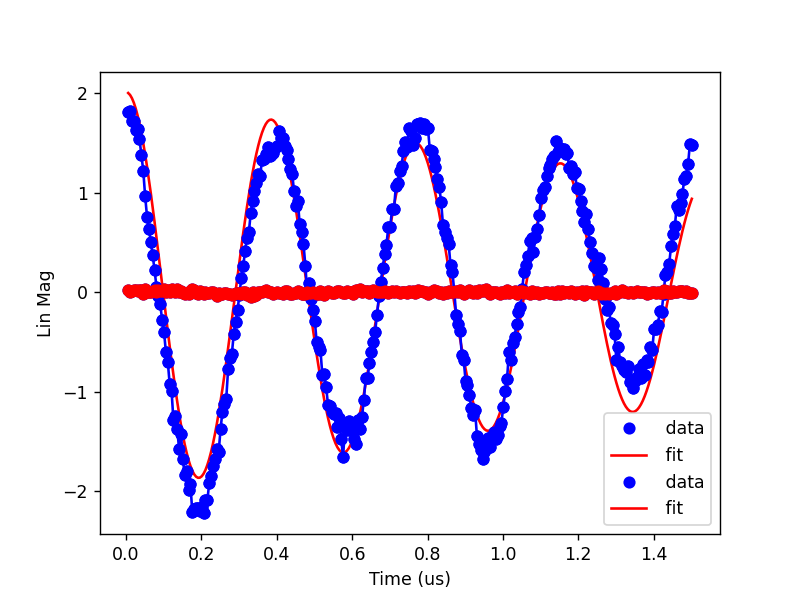

ge contrast ratio from I data =  0.009222760667290492
Qubit Temp: 43.67678366664303  mK
Qubit Excited State Occupation: 0.00913847866569366


In [222]:
result_dict = h5py.File('C:\\_Lib\\python\\Archive\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00012_lenrabi_ef.h5', 'r')

avgq = result_dict['avgq'][0]
avgi = result_dict['avgi'][0]
mag_nopi = np.sqrt(avgq**2 + avgi**2)
mag_nopi = mag_nopi-np.mean(mag_nopi)
time_pts = result_dict['xpts'][0]

result_dict = h5py.File('C:\\_Lib\\python\\Archive\\Qick Old meas lab\\Test ZCU216 experiments\\data\\00013_lenrabi_ef.h5', 'r')

avgq = result_dict['avgq'][0]
avgi = result_dict['avgi'][0]
mag_pi = np.sqrt(avgq**2 + avgi**2)
mag_pi = mag_pi-np.mean(mag_pi)

fig = plt.figure()
ax = fig.add_subplot(111)

time_pts = result_dict['xpts'][0]

p1 = dsf.fitdecaysin(time_pts, mag_pi, showfit=True)
p2 = dsf.fitdecaysin(time_pts, mag_nopi, showfit=True)


ax.plot(time_pts, mag_pi, 'bo-')
ax.plot(time_pts, mag_nopi, 'ro-')

nu_q = 4265

ratio = abs(p2[0] / p1[0])
print("ge contrast ratio from I data = ", ratio)
print("Qubit Temp:", 1e3 * temperature_q(nu_q * 1e6, ratio), " mK")
print("Qubit Excited State Occupation:", occupation_q(nu_q, temperature_q(nu_q, ratio)))

# p = fitdecaysin(time_pts, mag, showfit=True)
# t_pi = 1 / (2 * p[1])
# t_half_pi = 1 / (4 * p[1])

# print("Pi-pulse time:", t_pi)

ax.set_ylabel('Lin Mag')
ax.set_xlabel('Time (us)')
# ax.set_ylim(-0.1,0.1)
ax.legend()

# Qubit Temperature

In [3]:
from CL_multimode_experiments.qubit_temperature import *

In [4]:
path_to_parent = r'C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments'
qubit_temp = QubitTemperatureExperiment(path=path_to_parent,config_file='config_new.json')
qubit_temp.cfg.expt={
       "start": 3000,  # in mic sec
       "step": 50, 
       "expts": 100, 
       "reps": 1000,
       "rounds": 1,
       "sigma_test": .2,
       "ge_pi_after": False,
       "rounds_without_pi_first":False,
       "pi_qubit":True}  # "rounds" key

C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments test0
config_new.json test
C:\_Lib\python\Qick Old meas lab\Test ZCU216 experiments\config_new.json test1
{'device': {'soc': {'resonator': {'ch': 4, 'nyqist': 1, 'res_phase': 0, 'gain': 1000, 'freq': 186.941860258892, 'phase': 0}, 'readout': {'ch': [0], 'nyqist': 1, 'length': 5, 'readout_length': 5, 'adc_trig_offset': 60, 'relax_delay': 50, 'freq': 186.941860258892, 'phase': 0}, 'qubit': {'ch': 6, 'nyqist': 1, 'f_ge': 4265.424523771228, 'f_ef': 4101.630947496188, 'pulses': {'pi_ge': {'gain': 2400, 'sigma': 0.2393}, 'pi2_ge': {'gain': 2400, 'sigma': 0.11965}}}}}, 'aliases': {'soc': 'myqick'}} test2


In [5]:
mxg1.set_output(state=True)
result_dict = qubit_temp.acquire(progress=True)
mxg1.set_output(state=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Measuring $\chi$

Resonator Frequency (GHz): 7.286690695434419
Resonator HWHM (MHz): 0.8077055320512484
Q: 4510.734671414929


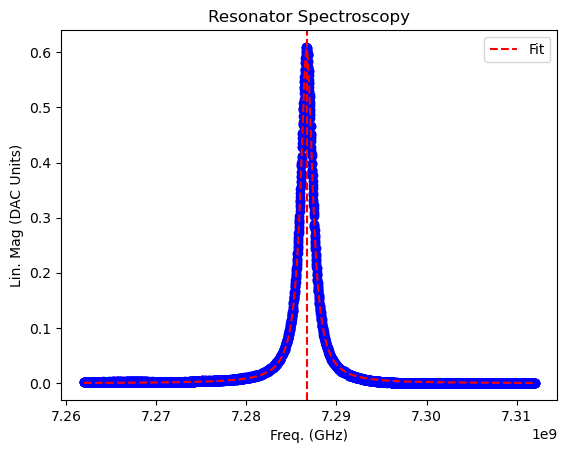

In [ ]:
# From PNAX measurement:

# Input

file = h5py.File(data_path + '00000_resonator_spec_1avg.h5' , 'r')

###
freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]

lin_mag = 10**(log_mag/10)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag,'bo')

p = dsf.fitlor(freq, lin_mag)
ax.plot(freq, dsf.lorfunc(p, freq), c='r', linestyle='--', label="Fit")

resonator_freq = p[2]
resonator_hwhm = p[3]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Resonator Frequency (GHz):", resonator_freq*1e-9)
print("Resonator HWHM (MHz):", resonator_hwhm*1e-6)
print("Q:", resonator_freq/2/resonator_hwhm)

ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_xlabel('Freq. (GHz)')
ax.set_title('Resonator Spectroscopy')
ax.legend()

Resonator (|g>) Frequency (GHz): 7.286470909227547
Resonator (|g>) HWHM (MHz): 1.2330488294494195
Q (|g>): 2954.656269566023
Resonator (|e>) Frequency (GHz): 7.2855049005608565
Resonator (|e>) HWHM (MHz): 1.3241338383405388
Q (|e>): 2751.0455097542717
chi = -0.9660086666904988 MHz


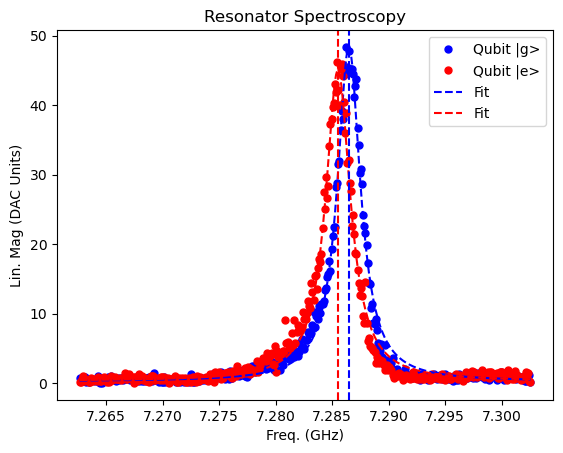

In [248]:
# Input

data = h5py.File(data_path + '00011_ResonatorSpectroscopy.h5', 'r')  # |g> state resonator
data_e = h5py.File(data_path + '00012_ResonatorSpectroscopy.h5', 'r')  # |e> state resonator

lo_freq = 7

### 

freq = data['xpts'][0]/1e3 + lo_freq
avgq = data['avgq'][0]
avgi = data['avgi'][0]
lin_mag = avgq**2 + avgi**2

freq_e = data_e['xpts'][0]/1e3 + lo_freq
avgq_e = data_e['avgq'][0]
avgi_e = data_e['avgi'][0]
lin_mag_e = avgq_e**2 + avgi_e**2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag, c='b', linestyle='None', marker='o', markersize=5.,  label='Qubit |g>')
ax.plot(freq_e, lin_mag_e, c='r', linestyle='none', marker='o', markersize=5., label='Qubit |e>')

p = dsf.fitlor(freq, lin_mag)
ax.plot(freq, dsf.lorfunc(p, freq), c='b', linestyle='--', label="Fit")

p_e = dsf.fitlor(freq_e, lin_mag_e)
ax.plot(freq_e, dsf.lorfunc(p_e, freq), c='r', linestyle='--', label="Fit")

resonator_freq = p[2]
resonator_e_freq = p_e[2]
resonator_hwhm = p[3]
resonator_e_hwhm = p_e[3]
ax.axvline(resonator_freq, linestyle='--', c='b')
ax.axvline(resonator_e_freq, linestyle='--', c='r')

print("Resonator (|g>) Frequency (GHz):", resonator_freq)
print("Resonator (|g>) HWHM (MHz):", resonator_hwhm*1e3)
print("Q (|g>):", resonator_freq/2/resonator_hwhm)

print("Resonator (|e>) Frequency (GHz):", resonator_e_freq)
print("Resonator (|e>) HWHM (MHz):", resonator_e_hwhm*1e3)
print("Q (|e>):", resonator_e_freq/2/resonator_e_hwhm)

print("chi = " + str((resonator_e_freq - resonator_freq)*1e3) + " MHz")

ax.set_ylabel('Lin. Mag (DAC Units)')
ax.set_xlabel('Freq. (GHz)')
ax.set_title('Resonator Spectroscopy')
ax.legend()


# Resonator Temperature

0.08638746346858406 0.030136586490632444
Chi:  0.53035 MHz
Kappa:  1.6154732245350756 MHz
Cavity Occupation 0.0284
Cavity temperature = 88.26751030420229 mK
Cavity temperature+ = 96.01070607425514 mK
Cavity temperature- = 78.93707188894795 mK


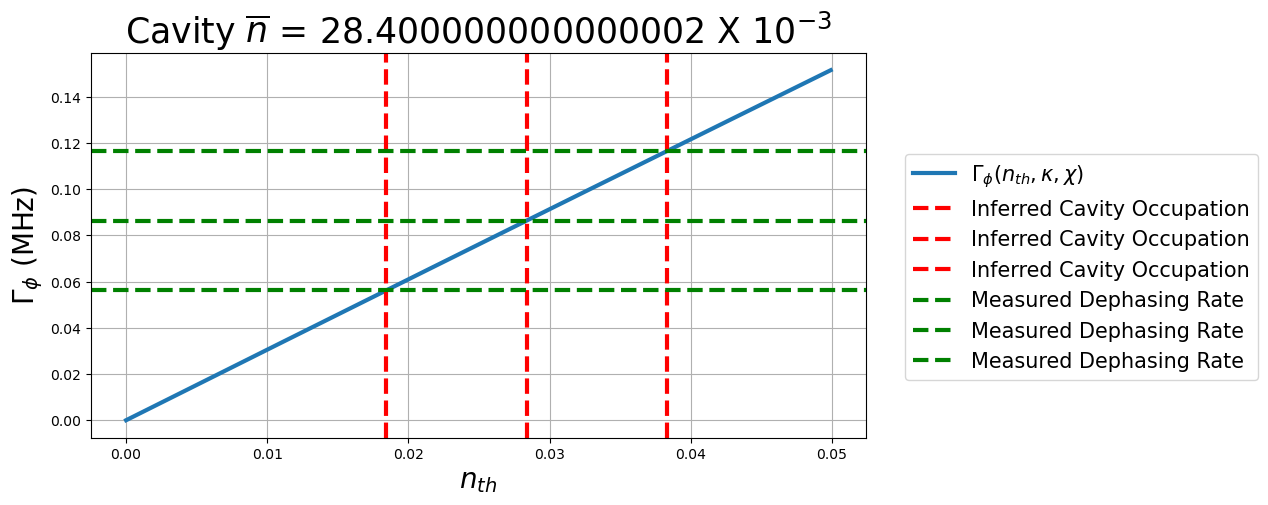

In [250]:
from numpy import *
from matplotlib.pyplot import *

# Input

T2 = 8.20443
T2err = 2.0
T1 = 14.085337
T1err = 4

nu_r = 7.28697  # GHz, Freq.
Q = 4510.734

chi = 2*np.pi*1.0607/2  # MHz, Angular Freq.  # Question: should this be negative? 

###

gph  = 1/(T2) - 1/(2*T1)
gpherr = np.sqrt( (1/(2*T1))**4*T1err**2 + (1/(T2))**4*T2err**2 )

print (gph, gpherr)

kappa = 2*np.pi*nu_r/Q*1e3

print ("Chi: ", chi/(2*np.pi), "MHz")
print ("Kappa: ", kappa/(2*np.pi), "MHz")

def temperature_cav(nu,mean_n):
    Kb = 1.38e-23
    h = 6e-34
    return h*nu/(Kb*np.log((1+mean_n)/mean_n))

def occupation_cav(nu,T):
    Kb = 1.38e-23
    h = 6e-34
    T = T*1e-3
    return 1/(exp(h*nu/(Kb*T))-1)


def dephasing(kappa,chi,nth):
    return kappa/2.0*real(sqrt((1+2*1j*chi/kappa)**2 + ((8*1j*chi*nth))/kappa)-1)

def freq_shift(kappa,chi,nth):
    return kappa/2.0*imag(sqrt((1+2*1j*chi/kappa)**2 + ((8*1j*chi*nth))/kappa))

figure(figsize=(10,5))
plt.subplot(111)
n_th = np.arange(0.0,0.05,0.0001)

plot(n_th, np.array([dephasing(kappa,chi,n) for n in n_th] ), label = '$\Gamma_{\phi}(n_{th}, \kappa, \chi)$', linewidth=3)

n_cav = n_th[argmin(abs(array([dephasing(kappa,chi,n) for n in n_th]) - gph))]
n_cav_pluserr = n_th[argmin(abs(array([dephasing(kappa,chi,n) for n in n_th]) - (gph+gpherr)))]
n_cav_negerr = n_th[argmin(abs(array([dephasing(kappa,chi,n) for n in n_th]) - (gph-gpherr)))]
print ("Cavity Occupation", n_cav)

axvline(n_cav,linestyle='dashed', label="Inferred Cavity Occupation",color='r', linewidth=3)
axvline(n_cav_pluserr,linestyle='dashed', label="Inferred Cavity Occupation",color='r', linewidth=3)
axvline(n_cav_negerr,linestyle='dashed', label="Inferred Cavity Occupation",color='r', linewidth=3)

axhline(gph,linestyle='dashed', label="Measured Dephasing Rate",color='g', linewidth=3)
axhline(gph+gpherr,linestyle='dashed', label="Measured Dephasing Rate",color='g', linewidth=3)
axhline(gph-gpherr,linestyle='dashed', label="Measured Dephasing Rate",color='g', linewidth=3)

ylabel('$\Gamma_{\phi}$ (MHz)', fontsize='20')
xlabel('$n_{th}$', fontsize='20')
title('Cavity $\overline{n}$ = %s X $10^{-3}$' %(n_cav*1e3), fontsize='25')
grid()
legend(loc=(1.05,0.15),fontsize='15')
print ("Cavity temperature = %s mK"%(1e3*temperature_cav(nu_r*1e9,n_cav)))
print ("Cavity temperature+ = %s mK"%(1e3*temperature_cav(nu_r*1e9,n_cav_pluserr)))
print ("Cavity temperature- = %s mK"%(1e3*temperature_cav(nu_r*1e9,n_cav_negerr)))

# IQ Histogram

In [261]:
data = h5py.File(data_path + '\\' + '00010_iq_hist.h5', 'r')

Readout Fidelity: 0.3781
Rotation Angle: -1.3696106862377702 [rad.] | -78.47291189744065 [deg.]


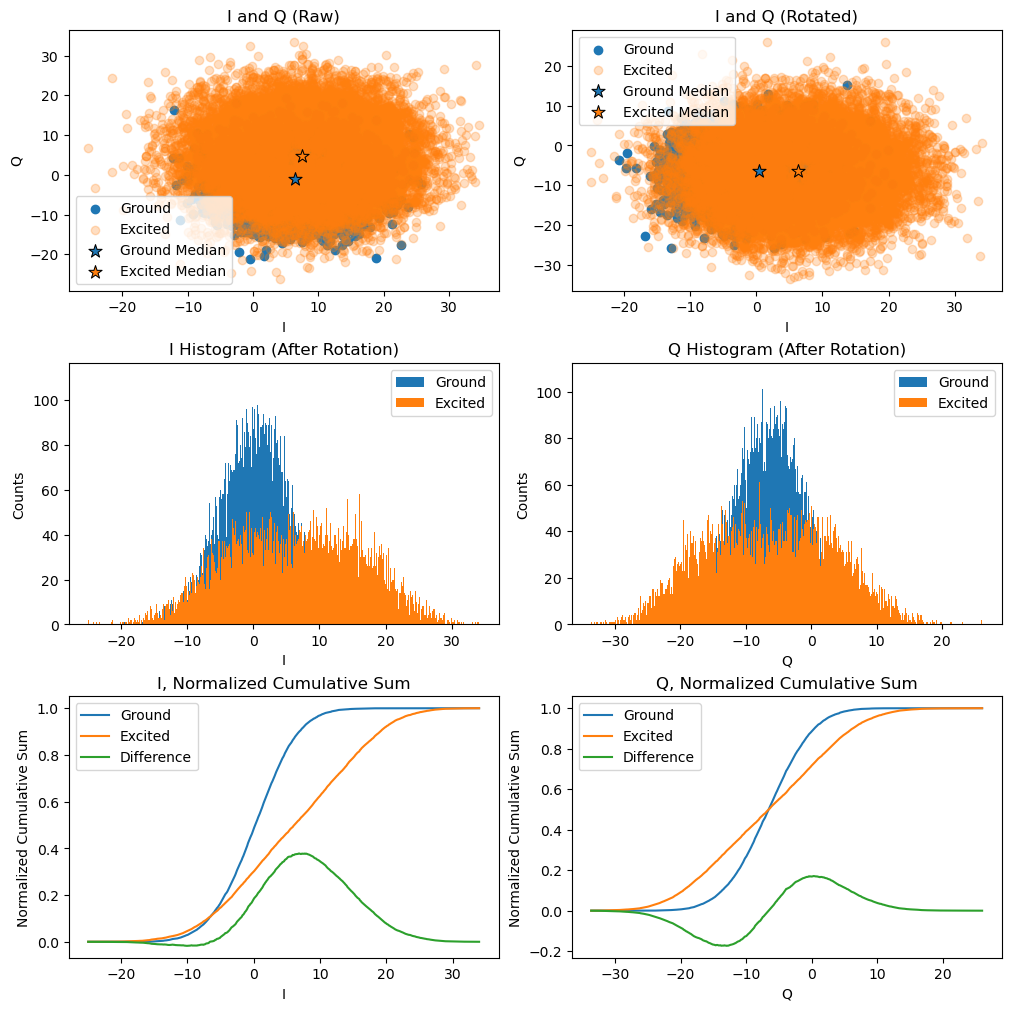

In [264]:
i_g = data['ig'][0]
q_g = data['qg'][0]
i_e = data['ie'][0]
q_e = data['qe'][0]

analysis = IQHistAnalysis(i_g, q_g, i_e, q_e)
analysis.analyze(bins=500, plot=True)